# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Partial correlations
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
# I'm using pingouin for partial correlations.
# You might need to install it, e.g., using the line below.
# This needs to be run only once per install.
# conda install -c conda-forge pingouin
import pingouin as pg

In [3]:
## the example from the video

# raw correlations
rmg = 0.7
rsg = 0.8
rms = 0.9

# partial correlations
rho_mg_s = (rmg - rsg*rms) / (np.sqrt(1 - rsg**2)*np.sqrt(1 - rms**2))
rho_sg_m = (rsg - rmg*rms) / (np.sqrt(1 - rmg**2)*np.sqrt(1 - rms**2))

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [4]:
## now for datasets

rng = np.random.default_rng()

N = 76

# correlated datasets
x1 = np.linspace(1, 10, N) + rng.standard_normal(size=N)
x2 = x1 + rng.standard_normal(size=N)
x3 = x1 + rng.standard_normal(size=N)

# let's convert these data to a pandas frame
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

# compute the "raw" correlation matrix
cormatR = df.corr()
print(cormatR)
# print out one value
print(cormatR.values[1, 0])

print(' ')

# compute the partial correlation matrix
partialCorMat = df.pcorr()
print(partialCorMat)
# print out one value
print(partialCorMat.values[1, 0])

          x1        x2        x3
x1  1.000000  0.920678  0.945376
x2  0.920678  1.000000  0.870636
x3  0.945376  0.870636  1.000000
0.9206775434576027
 
          x1        x2        x3
x1  1.000000  0.608626  0.748919
x2  0.608626  1.000000  0.001962
x3  0.748919  0.001962  1.000000
0.6086263623293506


In [5]:
# partial correlation
pc = pg.partial_corr(df, x='x3', y='x2', covar='x1')
print(' ')
print(pc)

 
          n         r          CI95%     p-val
pearson  76  0.001962  [-0.23, 0.23]  0.986668


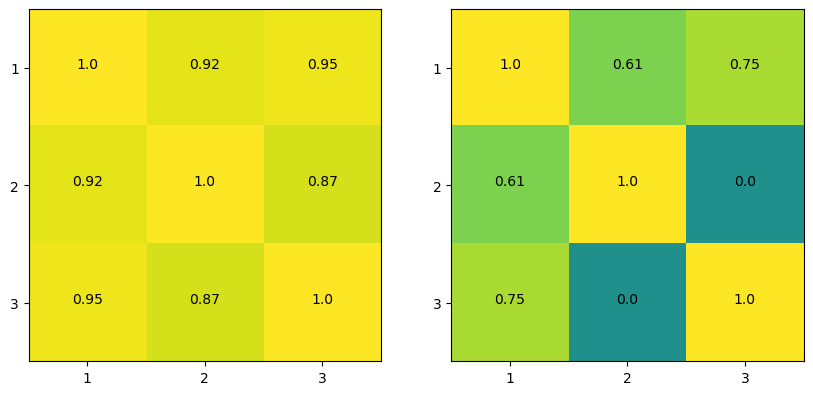

In [6]:
## visualize the matrices

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# raw correlations
ax[0].imshow(cormatR.values, vmin=-1, vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_xticklabels(['1', '2', '3'])
ax[0].set_yticks(range(3))
ax[0].set_yticklabels(['1', '2', '3'])
# add text 
for i in range(3):
    for j in range(3):
        ax[0].text(i, j, np.round(cormatR.values[i, j], 2), horizontalalignment='center')
        
# partial correlations
ax[1].imshow(partialCorMat.values, vmin=-1, vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_xticklabels(['1', '2', '3'])
ax[1].set_yticks(range(3))
ax[1].set_yticklabels(['1', '2', '3'])
# add text 
for i in range(3):
    for j in range(3):
        ax[1].text(i, j, np.round(partialCorMat.values[i, j], 2), horizontalalignment='center')

plt.show()